In [ ]:
from src.clients import together, openrouter, elevenlabs
from src.utils import displayB64Image, saveB64Image, extractSingleJsonString, extractSingleArray, displayText, displayAudio

In [2]:
prompt = """Write an action-packed story about the given input with 5-7 distinct scenes, each one vividly bringing to life the characters and settings through descriptive language. Incorporate a mix of dialogue and narration to create a dynamic, immersive experience. Emphasize the actions and facial expressions of the characters, painting a picture with words that transports the reader to the world of the story. Use a variety of locations and scenery changes to keep the narrative engaging and unpredictable, seamlessly transitioning between scenes to maintain a sense of flow. Balance close-ups of the characters with wider shots of the environment, allowing the reader to see the bigger picture and appreciate the setting. Include moments of high visual impact and drama, where the action unfolds like a cinematic spectacle.
Do not include scene titles or other kind of metadata.
Respond with a valid JSON object, making sure to include the closing bracket. The object should only contain the key `story` with the full story as a string value.

Input: a superhero turns to a life of crime"""

completion = openrouter.chatCompletion(prompt, max_tokens=1024, json=True)
story = extractSingleJsonString(completion, 'story')
# completion

# TODO
# assert that the text is long enough and not cut off
# i saw a library that could do more advanced stuff like this using llm, what was it?

displayText(story)
# tts_audio  = elevenlabs.getSpeechB64(story)
# displayAudio(tts_audio)

In [3]:
prompt = """Given the following input story, Assistant's task is to extract descriptions of 4 scenes in the story to create images for.

Each scene should contextually be from the story but Assistant should expand on them to create vivid and detailed image descriptions.

Respond with a valid JSON object. The object should only contain the key `scenes` with an array of 4 strings as values.
Input Story: """
prompt = f"{prompt}\n```{story}```"
completion = openrouter.chatCompletion(prompt, max_tokens=1024, json=True)
scenes = extractSingleArray(completion, 'scenes')
# completion
scenes

["A dark and gritty cityscape at dusk, with a lone figure standing atop a skyscraper. The figure, Jack Harris, aka The Guardian, is silhouetted against the vibrant colors of the city, his eyes cast downward in a mixture of sadness and disillusionment. The city lights twinkle below, a stark contrast to the darkness that has consumed The Guardian's heart. In the foreground, the iconic suit of The Guardian is visible, the emblem on his chest still proudly displaying the eagle, but with a hint of wear and tear, symbolizing the character's growing disillusionment.",
 "A dimly lit museum hallway, the walls lined with priceless artifacts and treasures. The Viper, dressed in his menacing suit, is seen cracking a display case, the sound of shattering glass echoing through the hallway. The Star of India, a dazzling diamond, sparkles in the dim light, casting a mesmerizing glow on The Viper's face. His eyes gleam with excitement, and his smile grows wide as he snatches the gemstone, the rush of a

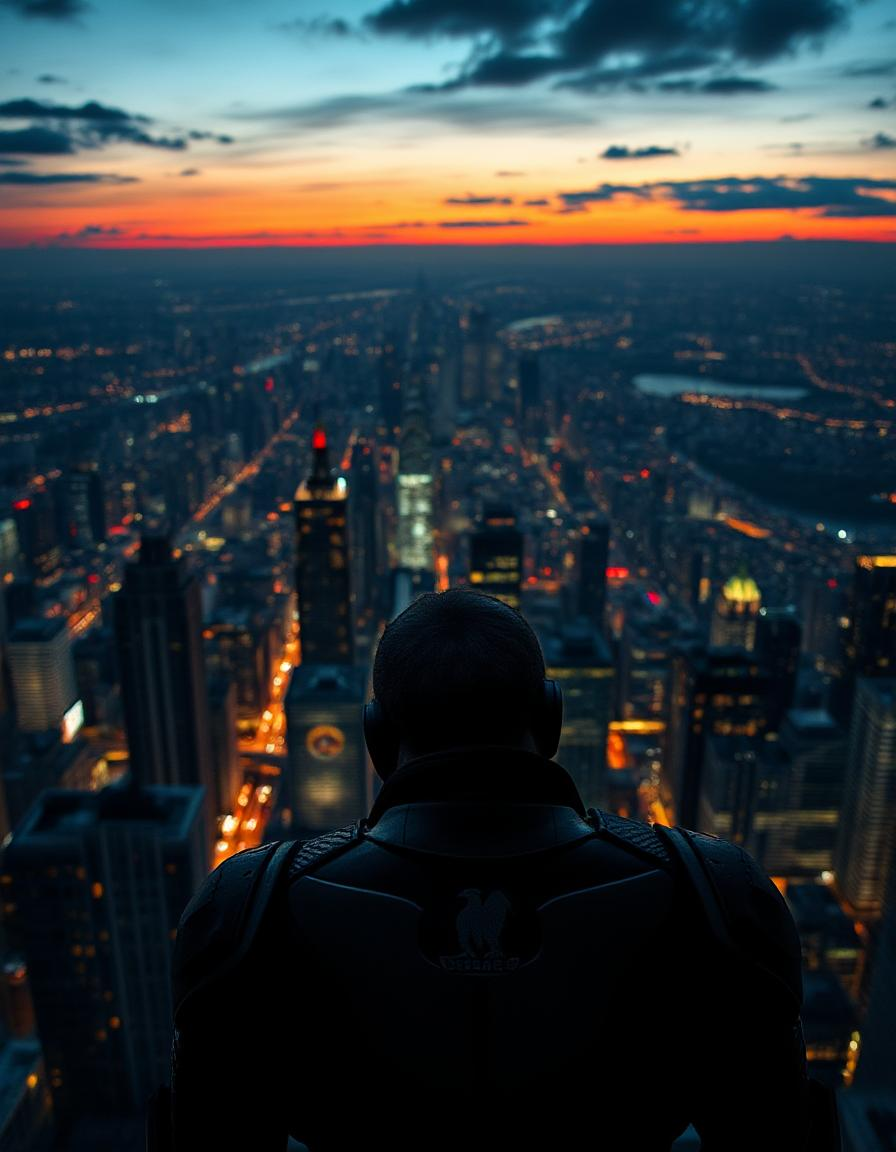

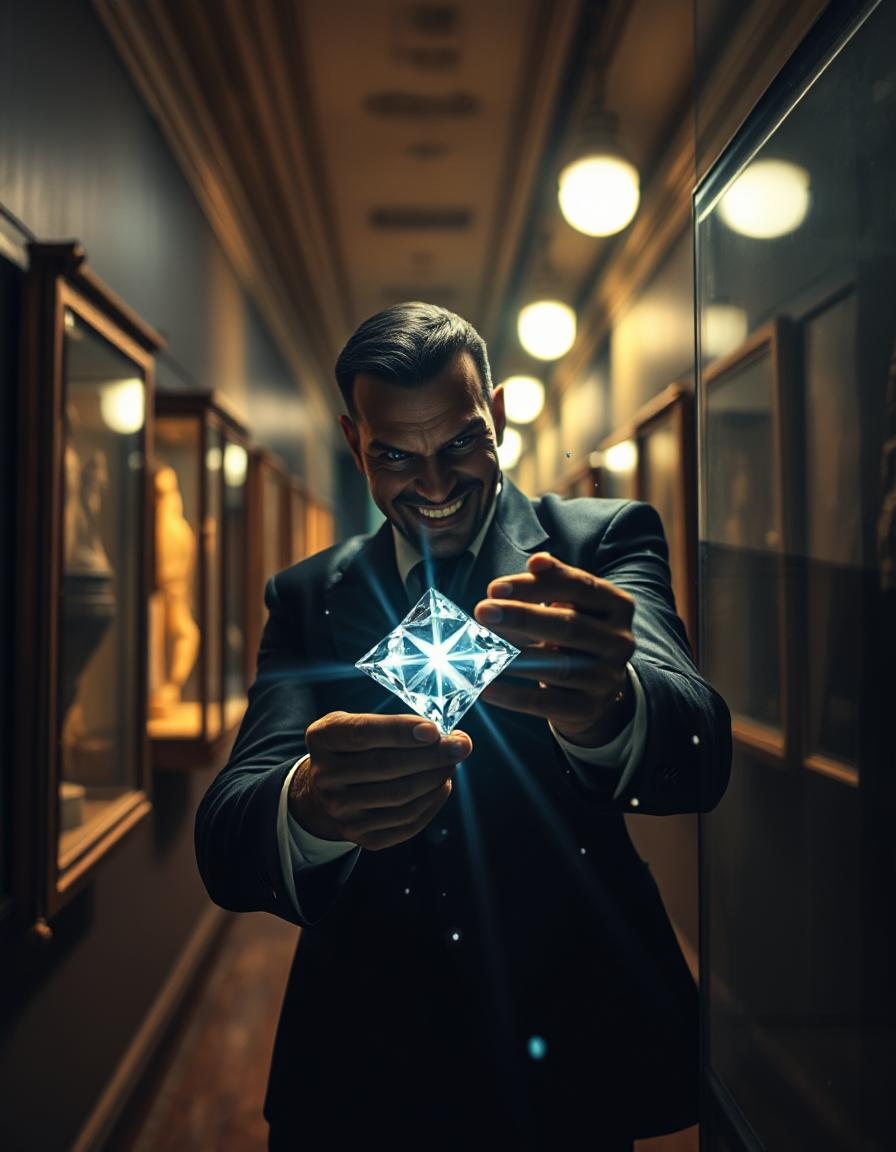

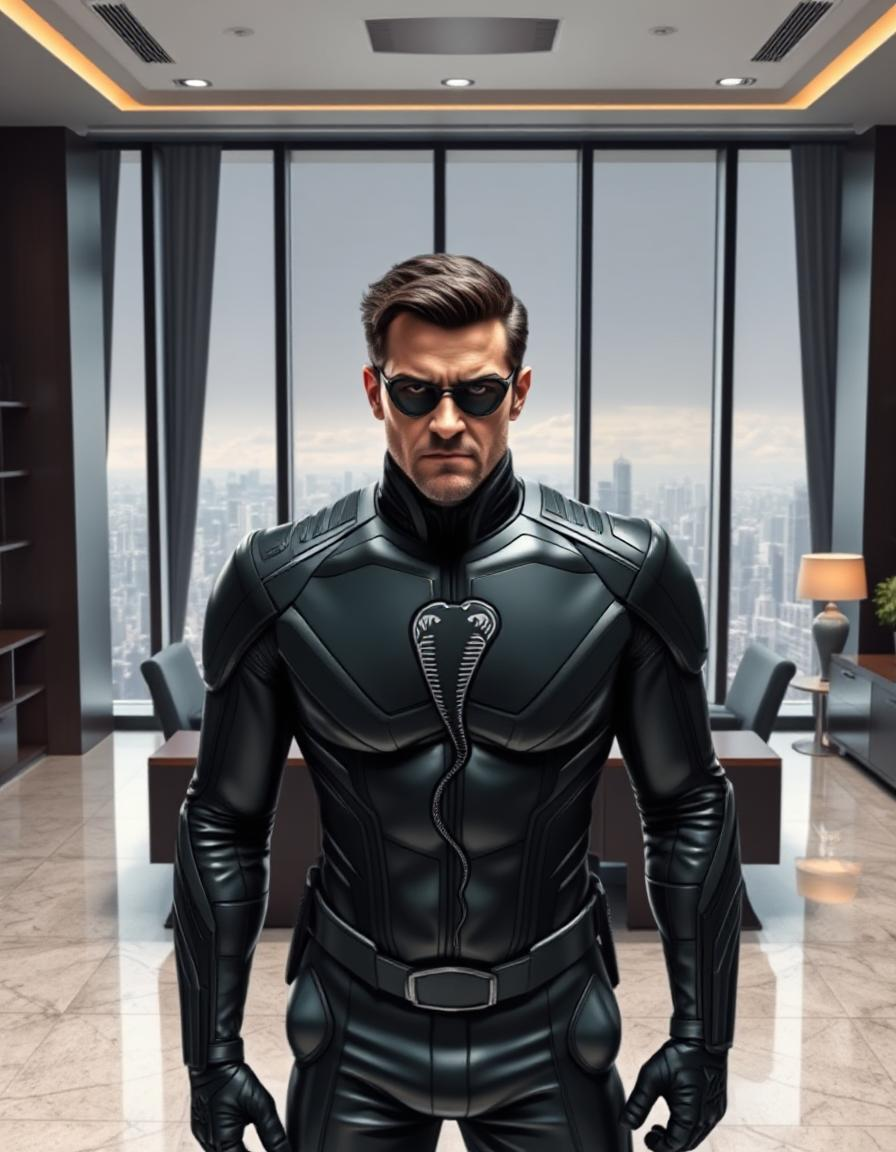

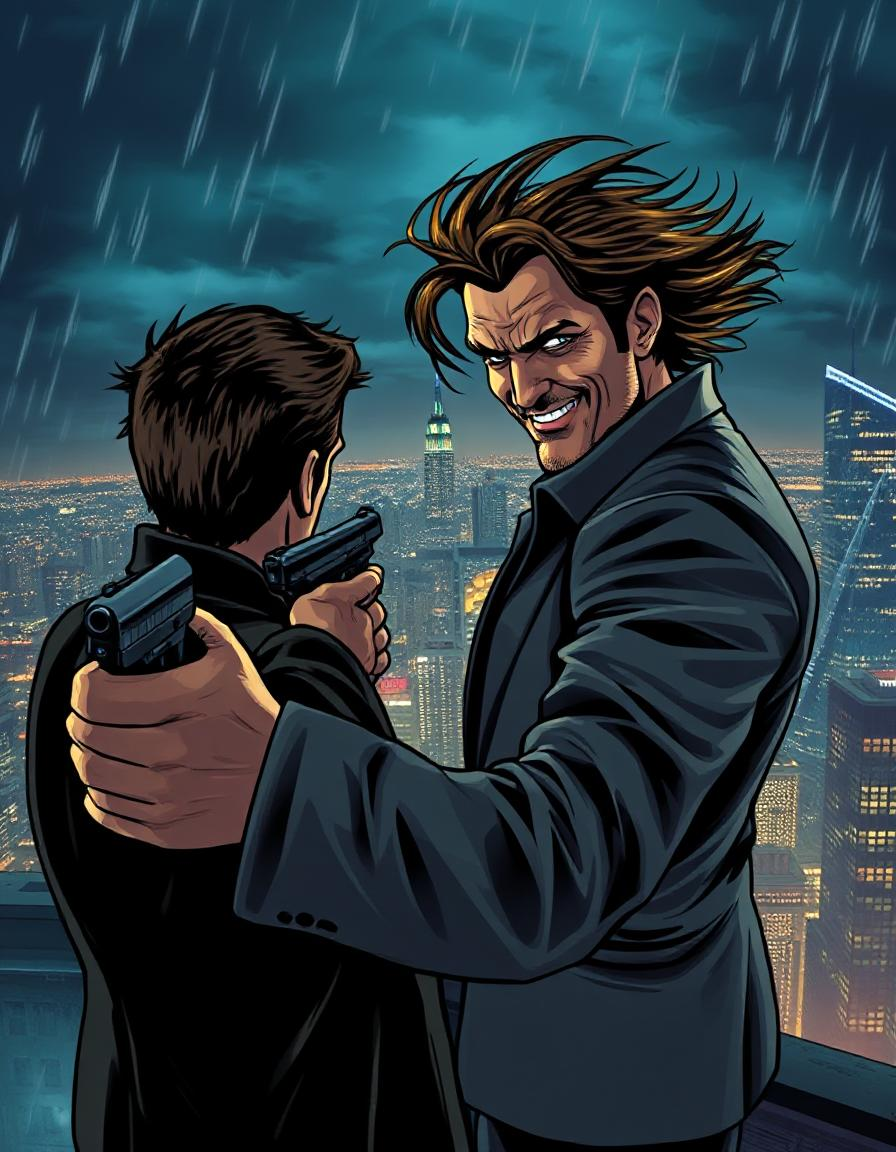

In [4]:
from time import sleep

steps = 2
for i, scene in enumerate(scenes):
	b64 = together.generateImage(scene, steps)
	displayB64Image(b64)
	sleep(1)